# MECANISMO BIELA-MANIVELA

## PROBLEMA POSICIÓN

### PASO 1: MODELADO DEL MECANISMO

El mecanismo a modelar es el Biela-Manivela. Podemos ver todas las variables en la figura.

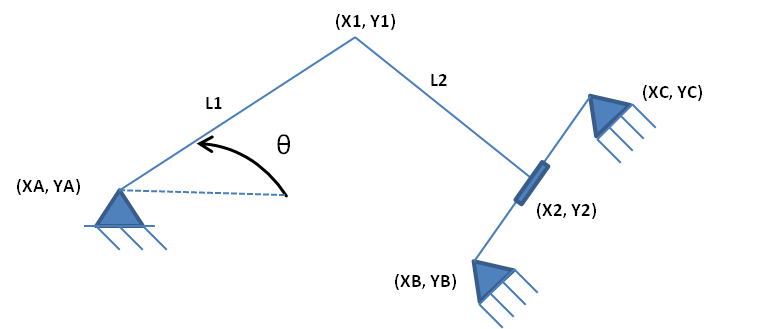

### PASO 2: GRADOS DE LIBERTAD

Los grados de libertad se calculan:

$G = 3·(n-1) - 2·PI - PII$

Siendo:

PI -> Numero de pares binarios de un grado de libertad 

PII -> Número de pares binarios de dos grados de libertad.
En este caso tendríamos:

\begin{eqnarray}
n &=& 4  \\
P_{I} &=& 4    \\
P_{II} &=& 0 
\end{eqnarray}

Por lo tanto:

$G = 3·(4-1) - 2·4 - 0 = 1$ 

### PASO 3: DEFINICIÓN DEL VECTOR q

El vector $\mathbf{q}$ de dimensión $N \times 1$ contiene las coordenadas dependientes del mecanismo. Es decir, contiene las coordenadas que no se mantienen fijas ya que varían con el tiempo. 

Lo hemos modelizado enpleando las $5$ coordenadas:

\begin{equation}
\mathbf{q} = 
 \begin{bmatrix}
 x_1 \\ y_1 \\ x_2 \\ y_2 \\ \theta
 \end{bmatrix}
\end{equation}


### PASO 4: IMPLEMENTACIÓN EN PYTHON

Al igual que en otros entornos de programación, necesitamos añadir librerías que contengan las funciones que vamos a utilizar. Esto es necesario hacerlo al principio del código. Las que vamos a usar son las siguientes: 

1. numpy -> Sirve para trabajar con arrays y matrices, ofreciendo una interfaz similar a los comandos en MATLAB. 
2. math -> La utilizaremos para usar funciones matemáticas.
3. pprint -> "pretty print", su función es ayudar a depurar el código.
4. matplotlib.pyplot -> Es necesaria para dibujar gráficas.

In [1]:
#PASO 4

import numpy as np
import math as math
import pprint  
import matplotlib.pyplot as plt  
import scipy.integrate as integrate 

# PASO 5: LECTURA DE DATOS

Los datos iniciales de los que partiremos para resolver este mecanismo mediante análisis cinemático por métodos numéricos son los parámetros constantes que definen el mecanismo, es decir, las variables que no cambian con el tiempo. En este caso serían las longitudes de las barras y las posiciones de los apoyos.

Además, como el mecanismo tiene un único grado de libertad, tenemos que escoger la **variable independiente** entre las componentes del vector $q$. En este caso hemos escogido el ángulo, por lo que también será un dato de partida.

1. Longitudes de las barras: $L_1, ~ y ~ L_2$.
2. Posición de los tres apoyos: $X_A, ~ Y_A, ~ X_B, ~ Y_B ~ X_C ~ y ~ Y_C$.
3. Ángulo que forma la primera barra respecto a la horizontal en radianes: $θ(t=0)$.

Una vez tengamos esos datos, definiremos una posición inicial.

In [2]:
#PASO 5
print ('BIELA-MANIVELA')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XC"] = float (input ('Introduce coordenada en x del punto C:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = float(input('Introduce coordenada en y del punto B: '))
meca["YC"] = float(input('Introduce coordenada en y del punto C: '))

# Defino posicion inicial:
q = np.array ([[0.1], [0.2], [1], [0.2], [meca["theta"]]])
print('q: ' + str(q))


BIELA-MANIVELA
Introduce longitud L1:1
Introduce longitud L2:2
Introduce angulo inicial theta:0.5
Introduce coordenada en x del punto B:2
Introduce coordenada en x del punto C:3
Introduce coordenada en y del punto B: 0
Introduce coordenada en y del punto C: 0
q: [[0.1]
 [0.2]
 [1. ]
 [0.2]
 [0.5]]


### PASO 6: MATRIZ DE RESTRICCIONES $\Phi(q)$

Este vector agrupa las ecuaciones de restricción y será de dimensión $mx1$.

Estas ecuaciones podrían definirse empleando diferentes tipos de coordenadas: independientes, dependientes, relativas dependientes, de punto de referencia y naturales. Estas últimas son las que vamos a usar nosotros. 

Para coordenadas naturales en el plano es necesario seguir un procedimiento:

1. Cada sólido debe tener al menos $2$ puntos.
2. Cada par de rotación debe tener $1$ punto.
3. Cada par prismático debe tener $3$ puntos alineados.
4. Se pueden añadir tantos puntos adicionales como fuera necesario.
5. De los puntos mencionados, los fijos no entran en el vector $q$.

Para la formación de la matriz de restricciones, tenemos que tener en cuenta que hay restricciones de sólido rígido y de pares cinemáticos.

En este caso necesitamos:

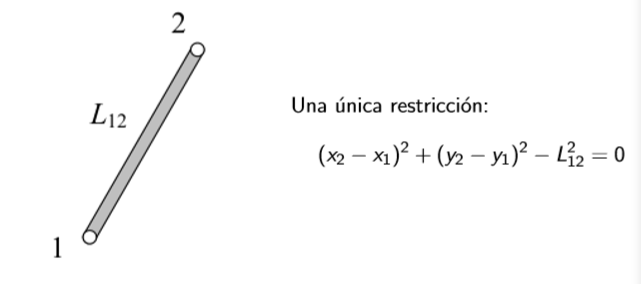


También necesitamos imponer una condición para la corredera, que consiste en hacer el producto escalar entre $B2$ y $BC$. Se basa en imponer que los 3 puntos estén alineados.

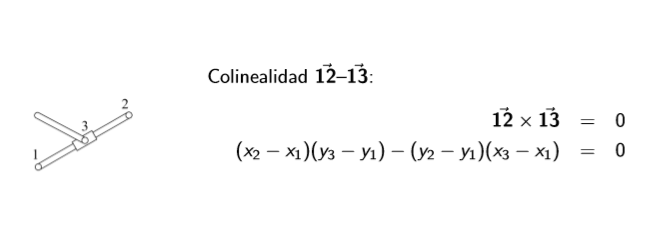


Además, como el vector de coordenadas dependientes tiene $5$ componentes tenemos que añadir una ecuación de restricción para el ángulo.

Esta última ecuación depende de si el ángulo en cuestión es demasiado pequeño. Esto se debe a que cuando un ángulo tiende a $0$, su seno también lo hace, por lo que para esos casos utilizaríamos la restricción del coseno. En cambio, cuando el ángulo tiende más a $90^\circ$, es el coseno el que se aproxima a $0$, por lo que en esos casos la restricción a utilizar sería la del seno. 

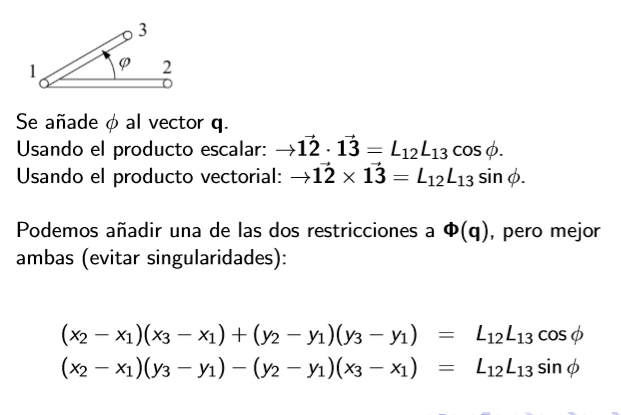
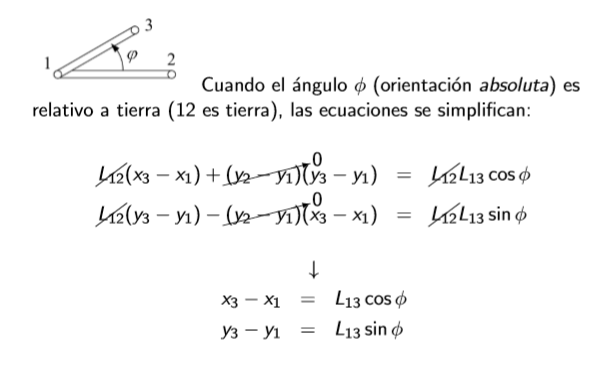
Para nuestro caso tendríamos:

$Si ~~ \cos (θ) < \frac{1}{\sqrt{2}} \rightarrow (X_1 - X_A) - L_1 · \cos(θ)$

$Si ~~ \cos (θ) > \frac{1}{\sqrt{2}} \rightarrow (Y_1 - Y_A) - L_1 ·  \sin (θ)$


La matriz quedaría:

1. $Si ~~ \cos (θ) < \frac{1}{\sqrt{2}}$
\begin{equation}
\mathbf{\Phi} = 
\begin{bmatrix}
(X_1-X_A)^2 + (Y_1-Y_A)^2 - L_1^2  \\
(X_2-X_1)^2 + (Y_2-Y_1)^2 - L_2^2 \\
(X_C-X_B)(Y_2-Y_B) - (Y_C-Y_B)(X_2-X_B) \\
 X_1-L_1\cos(θ)\\
\end{bmatrix}
\end{equation}

2. $Si ~~ \cos (θ) > \frac{1}{\sqrt{2}}$

\begin{equation}
\mathbf{\Phi} = 
\begin{bmatrix}
(X_1-X_A)^2 + (Y_1-Y_A)^2 - L_1^2  \\
(X_2-X_1)^2 + (Y_2-Y_1)^2 - L_2^2 \\
(X_C-X_B)(Y_2-Y_B) - (Y_C-Y_B)(X_2-X_B) \\
 Y_1-L_1\sin(θ)\\
\end{bmatrix}
\end{equation}

In [3]:
def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((5,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (X2 - meca["XB"])*(meca["YC"]-meca["YB"]) - (Y2-meca["YB"])*(meca["XC"]-meca["XB"])


    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Phi[3] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[3] = Y1-meca["L1"]*math.sin(theta)
    
    
    
    return Phi


### PASO 7: Matriz jacobiana Фq

Esta matriz de dimensiones $mxn$ está compuesta por las derivadas parciales de las ecuaciones de restricción con respecto al vector de cooordeandas dependientes.

Por ejemplo endríamos:

$\Phi_q$(0,0) = Derivada de $\Phi$(0) respecto a X1. 
$\Phi_q$(0,1) = Derivada de $\Phi$ (0) respecto a Y1. 
$\Phi_q$(1,0) = Derivada de $\Phi$(1) respecto a X1.

Tendríamos que construir la matriz elemento a elemento de esta manera.

Para la ecuación del ángulo hay que tener en cuenta que el jacobiano también tomará dos valores. Los posibles son: 

1. $Si ~~ \cos (θ) < \frac{1}{\sqrt{2}}$
   
    $\Phi_q(3,0) = 1$ 
    $\Phi_q(3,4) = L1 · \sin(θ)$ 
    
 

    
2. $Si ~~ \cos (θ) > \frac{1}{\sqrt{2}}$

    $\Phi_q(3,1) = 1$ 
    $\Phi_q(3,4) = -L1 · \cos(θ)$
    

Es decir, tenemos dos posibles matrices jacobianas:

1. $Si ~~ \cos (θ) < \frac{1}{\sqrt{2}}$

\begin{equation}
\mathbf{\Phi_q} = 
\begin{bmatrix}
2X_1 & 2Y_1 & 0 & 0 & 0 \\
-2(X_2-X_1) & -2(Y_2-Y_1) & 2(X_2-X_1) & 2(Y_2-Y_1) & 0\\
0 & 0 & Y_C-Y_B & X_B-X_C & 0\\
1 & 0 & 0 & 0 & L1\sin(θ)\\
\end{bmatrix}
\end{equation}

1. $Si ~~ \cos (θ) > \frac{1}{\sqrt{2}}$

\begin{equation}
\mathbf{\Phi_q} =
\begin{bmatrix}
2X_1 & 2Y_1 & 0 & 0 & 0  \\
-2(X_2-X_1) & -2(Y_2-Y_1) & 2(X_2-X_1) & 2(Y_2-Y_1) & 0 \\
0 & 0 & Y_C-Y_B & X_B-X_C & 0 \\
0 & 1 & 0 & 0 & -L1\cos(θ) \\
\end{bmatrix}
\end{equation}

In [4]:
#PASO 7

def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((5,5))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = meca["YC"] - meca["YB"]
    Jacob[2,3] = meca["XB"] - meca["XC"]

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Jacob[3,4] = meca["L1"]*math.sin(theta)
        Jacob[3,0] = 1
    else:
        Jacob[3,4] = -meca["L1"]*math.cos(theta)
        Jacob[3,1] = 1

 
    Jacob[4,4] = 1

    return Jacob

### PASO 8: RESOLUCIÓN DEL PROBLEMA POSICIÓN

El objetivo es obtener los valores de las coordenadas dependientes del vector $q$. 


Para resolverlo partimos de la ecuación:

$\Phi(q+Δq) = \Phi + \Phi_q · Δq = 0$

De donde despejamos:

$\Phi_q · Δq = -\Phi$

Esta ecuación se convertiría en $Ax=b$, siendo $A$ el jacobiano y $b$ $\Phi$. Sin embargo, no se pueden dividir matrices de esa manera, por lo que tenemos que multiplicar a ambos lados  de la igualdad por la izquierda por $A^{-1}$, es decir, por la inversa del jacobiano $Фq^{-1}$:

$ \underbrace{ \Phi q^-1 · Фq}_{= \mathbf{I_n}} · Δq = Фq^{-1} ·-Φ$

Por el lado izquierdo al multiplicar el jacobiano por su inversa toma el valor la unidad, por lo que quedaría:

$Δq = \Phi_q^{-1} · -Φ$

Y tpara terminar, tendríamos que el nuevo valor de q sería:

$q = q + Δq$

Hay que repetir este proceso hasta que el vector $\Phi$ se aproxime a $0$, lo que indicaría la validez del vector $q$ calculado. Sin embargo, hay datos iniciales para los que el mecanismo non converge. Por ejemplo, si decimos que $X_A=0, ~ X_A=0, ~  X_B=50, ~ Y_B=0 ~ y ~ L_1=1, ~ L_2=2, ~ L_3=3$, no existe tal posición. Por ello, tenemos que poner un límite de iteraciones, como por ejemplo $100$, y si llega a dicho límite tendremos que el mecanismo no converge.

Para poder operar con las matricces de ese modo, es necesario que las dimensiones sean correctas. En este caso tendríamos que añadir una fila a la matriz $\Phi$ y a $\Phi_q$. 
Como el mecanismo tiene un grado de libertad tenemos que asignar un valor conocido a una de las variables dependientes, como ya se explicó anteriormente. Esto se traduce en que para la matriz de restricciones $\Phi(4)=0$, ya que su valor permanece invariable. 
Por otro lado para la matriz $\Phi_q$ tendríamos que para la variable conocido su valor sería uno y el resto 0. Es decir:

$\text{Фq(4)} \rightarrow (0, 0, 0, 0, 1)$ 

Otra forma de meidir el error en el cálculo de q es calculando el módulo del vector $Δq$. Tiene que ser lo más próximo a $0$. 

Por último, podemos saber si el mecanismo convergerá calculando el rango de la matriz jacobiana. Si su rango es igual al número de coordenadas dependientes, convergerá.

In [5]:
def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((5,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        print("q=")
        pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        theta = q[4]
       
        fi=Phi(q,meca)
        print ("Phi" + "=")
        pprint.pprint(fi)
        J = jacob_Phiq(q,meca)
        print ("jacob" + "=")
        pprint.pprint(J)
        rango = np.linalg.matrix_rank(J, 1e-5)
        print("rango=" + str(rango) + "\n") #Si el rango es menor que el numero de filas no tiene solucion
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1

        
        print("error iter" + str(i) + "=")
        pprint.pprint(error)
    print("num iters:" + str(i))
    if (error > tolerancia):
        raise Exception ('No se puede alcanzar la posición')  
    return q

q=resuelve_prob_posicion(q,meca)

q=
array([[0.1],
       [0.2],
       [1. ],
       [0.2],
       [0.5]])
Phi=
array([[-0.95      ],
       [-3.19      ],
       [-0.2       ],
       [-0.27942554],
       [ 0.        ]])
jacob=
array([[ 0.2       ,  0.4       ,  0.        ,  0.        ,  0.        ],
       [-1.8       , -0.        ,  1.8       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -1.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        , -0.87758256],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])
rango=5

error iter1=
7.296958499116243
q=
array([[4.29114892],
       [0.47942554],
       [6.96337115],
       [0.        ],
       [0.5       ]])
Phi=
array([[17.64380792],
       [ 3.37062045],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])
jacob=
array([[ 8.58229785,  0.95885108,  0.        ,  0.        ,  0.        ],
       [-5.34444444,  0.95885108,  5.34444444, -0.95885108,  0.        ],
       [ 0. 

### PASO 9: Dibujar el mecanismo

Para dibujar el mecanismo, definimos un cuadro de dibujo con los ejes de la misma dimensión. Seguidamente, dibujamos cada barra por separado. 
Para dibujar cada barra tendríamos que indicar las posiciones inicial y final, yendo por un lado las coordenadas en el eje $X$ y por otro las coordenadas en el eje $Y$. Es decir, sería por ejemplo:

$Barra ~ 1 \rightarrow  ([X_A, X_1], [Y_A, Y_1])$

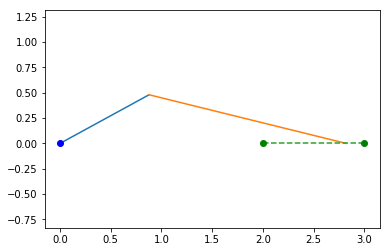

In [6]:
def dibuja_mecanismo(q, meca):


    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]
    
    plt.axis('equal')

    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([meca["XB"],meca["XC"]], [meca["YB"],meca["YC"]], linestyle='dashed')  

    plt.plot(meca["XA"], meca["YA"], 'bo')  
    plt.plot(meca["XB"], meca["YB"], 'go') 
    plt.plot(meca["XC"], meca["YC"], 'go') 
    plt.show()#block=False) 
    return

dibuja_mecanismo(q,meca)